<div style="width:100%;text-align: center;"> <img align=middle src="https://media.wired.com/photos/5926583dcfe0d93c4742fde3/master/w_2560%2Cc_limit/Alzheimers_TA.gif" alt="Heat beating" style="height:366px;margin-top:3rem;"> </div>

# <span style='color:aliceblue'><center style='background:#002E94;border-radius:0px 25px;padding:25px'> 🧠Alzheimer Classification with MRI Images </center></span>

# **<span style="color:#FF731D;">📰About the Dataset</span>**

A progressive disease that destroys memory and other important mental functions.
Brain cell connections and the cells themselves degenerate and die, eventually destroying memory and other important mental functions.

Memory loss and confusion are the main symptoms.
No cure exists, but medication and management strategies may temporarily improve symptoms.

The data consists of MRI images. The data has four classes of images both in training as well as a testing set:

> Mild Demented

> Moderate Demented

> Non Demented

> Very Mild Demented

In [20]:
#Environment check
import os
import warnings
warnings.filterwarnings("ignore")

In [21]:
#Imports
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import optimizers, losses
import seaborn as sns
import matplotlib.pyplot as plt

# System libraries
from pathlib import Path
import os.path

# Metrics
from sklearn.metrics import classification_report, confusion_matrix
import itertools

# **<span style="color:#FF731D;">📰Get Data </span>**

In [22]:
data = "input/AugmentedAlzheimerDataset"

In [23]:
image_dir = Path(data)

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg')) 

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

In [24]:
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

path = Path(data).rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

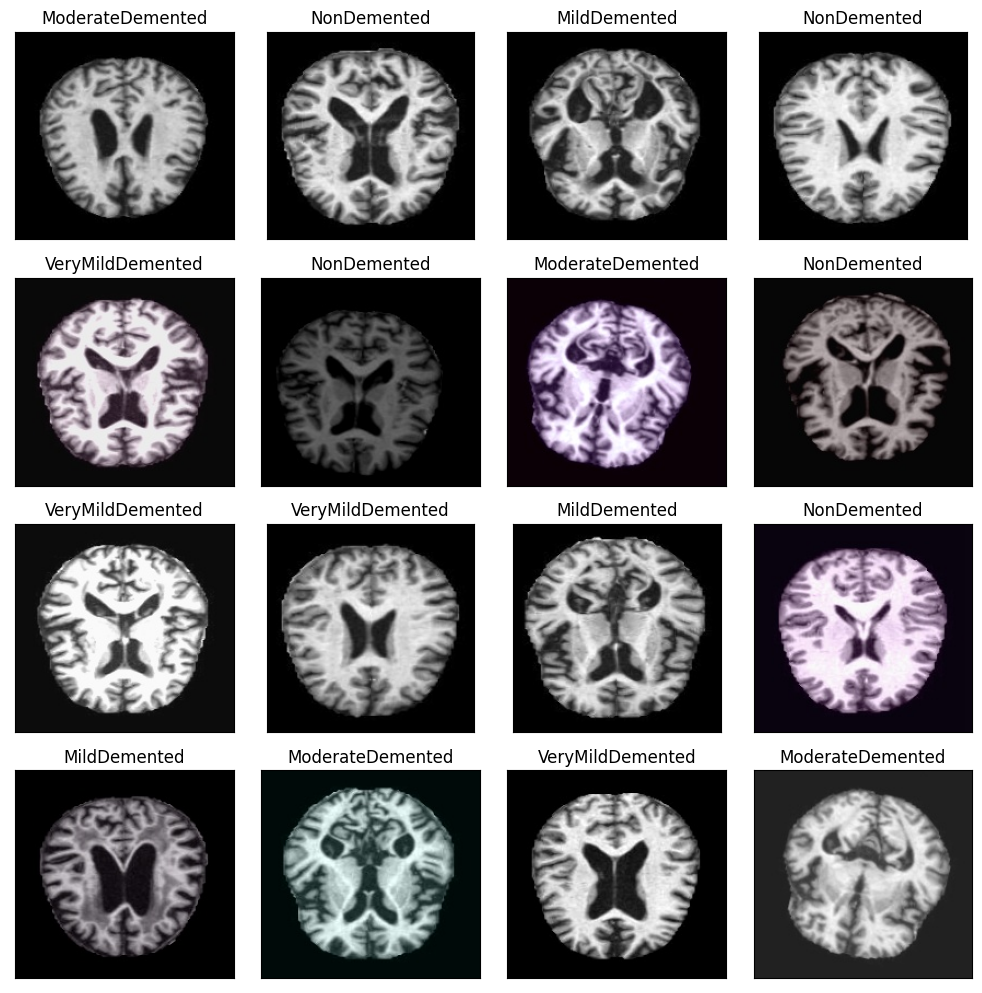

In [25]:
# Display 16 picture of the dataset with their labels
random_index = np.random.randint(0, len(image_df), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[random_index[i]]))
    ax.set_title(image_df.Label[random_index[i]])
plt.tight_layout()
plt.show()

In [26]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)  # set validation split


In [27]:
train_images = train_datagen.flow_from_directory(
    data,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
)  # set as training data

validation_images = train_datagen.flow_from_directory(
    data,  # same directory as training data
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
)  # set as validation data


Found 27188 images belonging to 4 classes.
Found 6796 images belonging to 4 classes.


In [28]:
train_images.class_indices

{'MildDemented': 0,
 'ModerateDemented': 1,
 'NonDemented': 2,
 'VeryMildDemented': 3}

In [29]:
validation_images.class_indices

{'MildDemented': 0,
 'ModerateDemented': 1,
 'NonDemented': 2,
 'VeryMildDemented': 3}

# **<span style="color:#FF731D;">🌟Let's try CNN Model</span>**

In [30]:
model = tf.keras.models.Sequential([
    Conv2D(16, (3,3), activation = 'relu', input_shape = (224,224, 3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dropout(0.2),
    Dense(4, activation = 'softmax')
])



In [31]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)
history = model.fit(
    train_images,
    steps_per_epoch=len(train_images),
    validation_data=validation_images,
    validation_steps=len(validation_images),
    epochs=10,
)

Epoch 1/10
850/850 [==============================] - 409s 480ms/step - loss: 0.7923 - accuracy: 0.6404 - val_loss: 0.5565 - val_accuracy: 0.7602
Epoch 2/10
850/850 [==============================] - 396s 466ms/step - loss: 0.4359 - accuracy: 0.8175 - val_loss: 0.3400 - val_accuracy: 0.8580
Epoch 3/10
850/850 [==============================] - 397s 466ms/step - loss: 0.2628 - accuracy: 0.8958 - val_loss: 0.2817 - val_accuracy: 0.8879
Epoch 4/10
850/850 [==============================] - 398s 468ms/step - loss: 0.1702 - accuracy: 0.9318 - val_loss: 0.2449 - val_accuracy: 0.9048
Epoch 5/10
850/850 [==============================] - 400s 470ms/step - loss: 0.1164 - accuracy: 0.9551 - val_loss: 0.2286 - val_accuracy: 0.9176
Epoch 6/10
850/850 [==============================] - 398s 468ms/step - loss: 0.0849 - accuracy: 0.9688 - val_loss: 0.3308 - val_accuracy: 0.9086
Epoch 7/10
850/850 [==============================] - 399s 470ms/step - loss: 0.0713 - accuracy: 0.9748 - val_loss: 0.2574 -

In [32]:
model.save(os.path.join('models','m1.h5'))

***Model is overfitting***

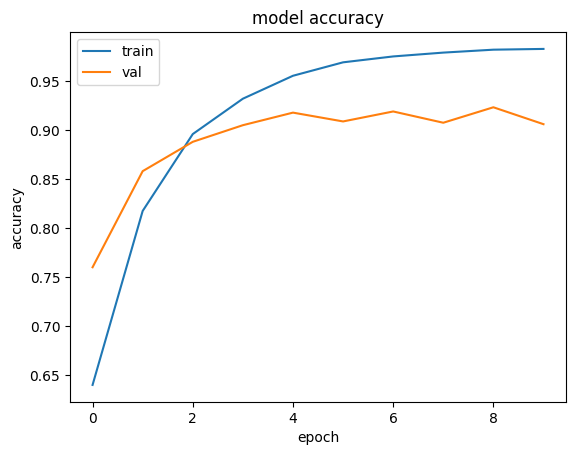

In [33]:
#Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

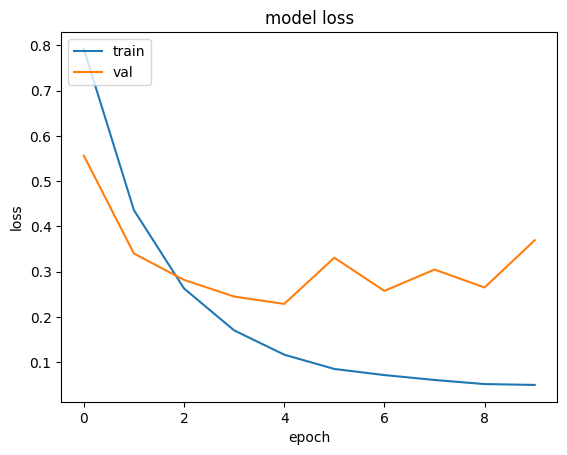

In [34]:
# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# **<span style="color:#FF731D;">🌟Let's try Inception Model (Transfer Learning)</span>**

In [35]:
inception_model = Sequential()

pretrained_model = tf.keras.applications.InceptionV3(
    include_top=False,
    input_shape=(224, 224, 3),
    pooling='avg', classes=4,
    weights='imagenet',
)
for layer in pretrained_model.layers:
    layer.trainable = False

inception_model.add(pretrained_model)


87910968/87910968 [==============================] - 5s 0us/step


In [36]:
inception_model.add(Flatten())
inception_model.add(Dense(512, activation='relu'))
inception_model.add(Dropout(0.2))
inception_model.add(Dense(4, activation='softmax'))

In [37]:
inception_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               1049088   
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 22,853,924
Trainable params: 1,051,140
Non-trainable params: 21,802,784
_________________________________________________________________


In [38]:
inception_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'],
)

history = inception_model.fit(
    train_images,
    steps_per_epoch=len(train_images),
    validation_data=validation_images,
    validation_steps=len(validation_images),
    epochs=10
)


Epoch 1/10
850/850 [==============================] - 555s 650ms/step - loss: 0.9711 - accuracy: 0.5652 - val_loss: 0.7989 - val_accuracy: 0.6358
Epoch 2/10
850/850 [==============================] - ETA: 0s - loss: 0.7946 - accuracy: 0.6330

In [ ]:
inception_model.save(os.path.join('models','m2.h5'))

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


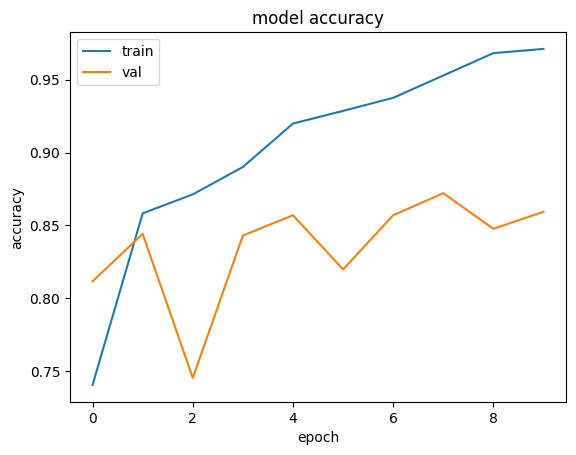

In [ ]:
#Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

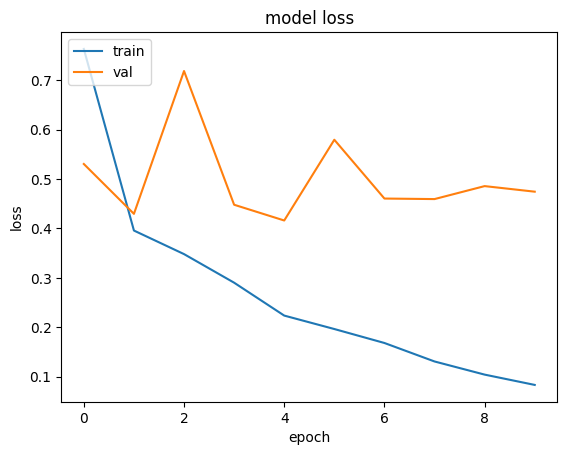

In [ ]:
# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# **<span style="color:#DA291C;">🤘Conclusion</span>**

> **This marks the end of 🧠Alzheimer Classification with MRI Images**

> **Stay Tuned for more..**

> **Please share your feedback and suggestions and help me improve 😇**